# **Classification**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5'

## Load Data

In [4]:
import numpy as np
import pandas as pd
df = (pd.read_csv("outputs/datasets/cleaned/phnx_2010_2025.csv")
      .drop(labels=['tomorrows_average'], axis=1))
print(df.shape)
df.head(3)

(3785, 21)


,year,weekday,open,high,low,close,volume,pre_open,pre_open_2,pre_high,...,pre_low,pre_low_2,pre_close,pre_close_2,pre_vol,pre_vol_2,pre_average,pre_average_2,average,target
0,2010,Wednesday,497.990021,497.990021,497.990021,497.990021,10729.0,507.246289,477.996320,510.282389,...,507.246289,477.996320,497.990021,497.990021,10729.0,13401.0,502.618155,487.993170,497.990021,1
1,2010,Thursday,507.468427,507.468427,503.543762,503.543762,6169.0,497.990021,507.246289,497.990021,...,497.990021,507.246289,497.990021,497.990021,10729.0,10729.0,497.990021,502.618155,505.506095,0
2,2010,Friday,503.543762,503.543762,503.543762,503.543762,6169.0,507.468427,497.990021,507.468427,...,503.543762,497.990021,503.543762,497.990021,6169.0,10729.0,505.506095,497.990021,503.543762,0


---

In [5]:
df.columns

Index(['year', 'weekday', 'open', 'high', 'low', 'close', 'volume', 'pre_open',
       'pre_open_2', 'pre_high', 'pre_high_2', 'pre_low', 'pre_low_2',
       'pre_close', 'pre_close_2', 'pre_vol', 'pre_vol_2', 'pre_average',
       'pre_average_2', 'average', 'target'],
      dtype='object')

In [6]:
to_remove = ['volume',
 'pre_vol',
 'pre_vol_2',
 'low',
 'close',
 'average',
 'pre_average',
 'pre_low_2',
 'pre_average_2',
 'pre_close',
 'pre_close_2',
 'high',
 'pre_high',
 'pre_high_2',
 'pre_open',
 'open',
 'pre_open_2']

In [7]:
variables = list(df.columns)
variables.pop()
variables.pop(0)

'year'

In [8]:
# variables = [item for item in variables if item not in to_remove]

In [9]:
variables

['weekday',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'pre_open',
 'pre_open_2',
 'pre_high',
 'pre_high_2',
 'pre_low',
 'pre_low_2',
 'pre_close',
 'pre_close_2',
 'pre_vol',
 'pre_vol_2',
 'pre_average',
 'pre_average_2',
 'average']

In [10]:
# df = df.query("year >= 2015").copy()
# df

In [11]:
# df = df.drop(['weekday'],axis=1)
# df

## ML Pipeline with all Data

In [ ]:
from sklearn.pipeline import Pipeline

# Feature Engineering
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.encoding import OrdinalEncoder


def PipelineDataCleaningAndFeatureEngineering():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['weekday'])),
        # ("OutlierWinsorizer", Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['open', 'high', 'low', 'close', 'volume'])),
        # ("YeoJohnsonNumericalTransformer", vt.YeoJohnsonTransformer(variables=variables)),  # ['open', 'high', 'low', 'close', 'volume']
        # ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
        #  method="spearman", threshold=0.6, selection_method="variance")),

    ])

    return pipeline_base


PipelineDataCleaningAndFeatureEngineering()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['weekday']))])

In [13]:
# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


def PipelineClf(model):
    pipeline_base = Pipeline([
        ("scaler", StandardScaler()),
        ("feat_selection", SelectFromModel(model)),
        ("model", model),
    ])

    return pipeline_base

In [14]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")

            model = PipelineClf(self.models[key])
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, )
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        return df[columns], self.grid_searches

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['target'], axis=1),
    df['target'],
    test_size=0.2,
    random_state=0,
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3028, 20) (3028,) (757, 20) (757,)


In [16]:
pipeline_data_cleaning_feat_eng = PipelineDataCleaningAndFeatureEngineering()
X_train = pipeline_data_cleaning_feat_eng.fit_transform(X_train)
X_test = pipeline_data_cleaning_feat_eng.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3028, 20) (3028,) (757, 20) (757,)


## Target Imbalance

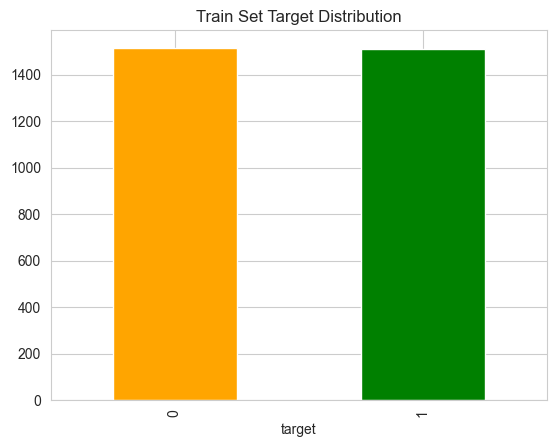

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
y_train.value_counts().plot(kind='bar', color=['orange', 'green'], title='Train Set Target Distribution')
plt.show()

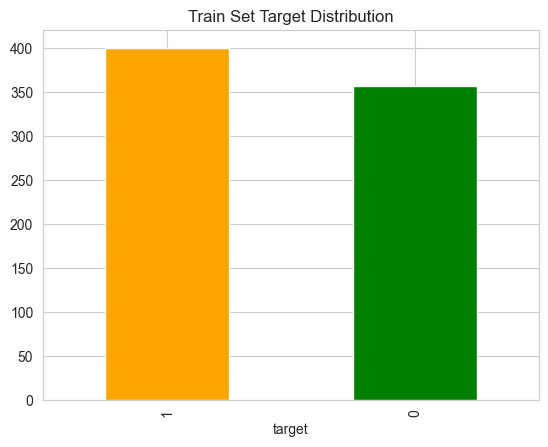

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
y_test.value_counts().plot(kind='bar', color=['orange', 'green'], title='Train Set Target Distribution')
plt.show()

## Grid Search CV - Sklearn

In [19]:
models_quick_search = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "XGBClassifier": XGBClassifier(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=0),
}

# empyt dictionary means the default hyperparameters will be used
params_quick_search = {
    "LogisticRegression": {},
    "XGBClassifier": {},
    "DecisionTreeClassifier": {},
    "RandomForestClassifier": {},
    "GradientBoostingClassifier": {},
    "ExtraTreesClassifier": {},
    "AdaBoostClassifier": {},
}

In [20]:
from sklearn.metrics import make_scorer, recall_score


search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train,
           scoring =  make_scorer(recall_score, pos_label=1),
           n_jobs=-1, cv=5)


Running GridSearchCV for LogisticRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ajv10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(



Running GridSearchCV for DecisionTreeClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [21]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary 

,estimator,min_score,mean_score,max_score,std_score
0,LogisticRegression,0.660066,0.692466,0.725166,0.02457
4,GradientBoostingClassifier,0.609272,0.635585,0.675497,0.022733
5,ExtraTreesClassifier,0.556291,0.599185,0.620462,0.02416
3,RandomForestClassifier,0.529801,0.578041,0.625828,0.032483
6,AdaBoostClassifier,0.481848,0.55959,0.655629,0.061915
2,DecisionTreeClassifier,0.5,0.558805,0.627063,0.042124
1,XGBClassifier,NaN,NaN,NaN,NaN


---

# Section 2

Section 2 content

In [35]:
models_search = {
    # "AdaBoostClassifierDT": AdaBoostClassifier(random_state=0),
    # "AdaBoostClassifierLR": AdaBoostClassifier(random_state=0),
    "LogisticRegression": LogisticRegression(random_state=0),
    # "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
}

# Documentation to help on hyperparameter list:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# We will not conduct an extensive search, since the focus
# is on how to combine all knowledge in an applied project.
# In a workplace project, you may spend more time in this step
params_search = {
    # "AdaBoostClassifierDT": {
    #     'model__estimator': [DecisionTreeClassifier()],
    #     'model__estimator__max_depth': [7, 5, 6],
    #     'model__estimator__min_samples_split': [10, 6, 8],
    #     'model__estimator__min_samples_leaf': [5, 3, 4],
    #     'model__n_estimators': [600, 800, 700],
    #     'model__learning_rate': [1.0, 2.0],
    # },
    # "AdaBoostClassifierLR": {
    #     'model__estimator': [LogisticRegression()],
    #     'model__estimator__penalty': ['l1'],
    #     'model__estimator__solver': ['liblinear'],
    #     'model__estimator__C': [600, 1000],
    #     'model__estimator__max_iter': [200, 300],
    #     'model__estimator__tol': [0.1, 0.2],
    #     'model__estimator__class_weight': [None, 'balanced'],
    #     'model__n_estimators': [50, 100, 200],
    #     'model__learning_rate': [0.1, 1.0],
    # },
    "LogisticRegression": [
        {
            'model__penalty': ['l1'],
            'model__solver': ['liblinear', 'saga'],
            'model__C': [200, 400, 600, 800, 1000],
            'model__max_iter': [100, 500, 1000],
            'model__tol': [0.5, 0.9, 6.0],
            'model__class_weight': [None, 'balanced'],
            'model__fit_intercept': [True, False],
            'model__warm_start': [True, False], 
        },
        {
            'model__penalty': ['l2'],
            'model__solver': ['newton-cg', 'sag', 'saga'],  # 'lbfgs',
            'model__C': [200, 100, 10],  # 0.1, 0.01, 0.001
            'model__max_iter': [400, 800, 1000],  # 10, 20, 50, 100, 
            'model__tol': [1e-8, 1e-9],  # 1e-4, 1e-5, 
            'model__class_weight': [None, 'balanced'],
            'model__fit_intercept': [True, False],  
        },
        {
            'model__penalty': ['elasticnet'],
            'model__solver': ['saga'],
            'model__C': [200, 100, 10],
            'model__max_iter': [800, 1000],
            'model__tol': [1e-8, 1e-9],
            'model__class_weight': [None, 'balanced'],
            'model__fit_intercept': [True, False],
            'model__l1_ratio': [0, 1],
        },
        {
            'model__penalty': [None],
            'model__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'model__C': [200, 100, 10, 1.0],
            'model__max_iter': [400, 800, 1000],
            'model__tol': [1e-8, 1e-9],
            'model__class_weight': [None, 'balanced'],
            'model__fit_intercept': [True, False], 
        },],
        # "GradientBoostingClassifier": {
        # 'model__loss': ['log_loss', 'exponential'],
        # 'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.25],
        # 'model__n_estimators': [50, 100, 200, 400],
        # 'model__subsample': [0.7, 0.8, 0.9],
        # 'model__min_samples_split': [2, 3, 4, 5],
        # 'model__min_samples_leaf': [1, 2, 3, 4],
        # 'model__max_depth': [2, 3, 4, 5],
    # }
}


In [36]:
from sklearn.metrics import recall_score, make_scorer
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring =  make_scorer(recall_score, pos_label=1),
           n_jobs=-1, cv=5, verbose=2)


Running GridSearchCV for LogisticRegression 

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits


In [37]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__C,model__class_weight,model__fit_intercept,model__max_iter,model__penalty,model__solver,model__tol,model__warm_start,model__l1_ratio
231,LogisticRegression,0.633663,0.693804,0.725166,0.033,400,balanced,True,500,l1,liblinear,0.9,False,NaN
363,LogisticRegression,0.633663,0.693804,0.725166,0.033,600,balanced,True,100,l1,liblinear,0.9,False,NaN
74,LogisticRegression,0.633663,0.693804,0.725166,0.033,200,balanced,True,100,l1,liblinear,0.9,True,NaN
650,LogisticRegression,0.633663,0.693804,0.725166,0.033,1000,balanced,True,100,l1,liblinear,0.9,True,NaN
651,LogisticRegression,0.633663,0.693804,0.725166,0.033,1000,balanced,True,100,l1,liblinear,0.9,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,LogisticRegression,0.0,0.0,0.0,0.0,1000,None,False,1000,l1,liblinear,6.0,False,NaN
700,LogisticRegression,0.0,0.0,0.0,0.0,1000,balanced,False,500,l1,liblinear,6.0,True,NaN
340,LogisticRegression,0.0,0.0,0.0,0.0,600,None,False,500,l1,liblinear,6.0,True,NaN
341,LogisticRegression,0.0,0.0,0.0,0.0,600,None,False,500,l1,liblinear,6.0,False,NaN


In [38]:
best_model = grid_search_summary.iloc[0,0]
best_model

'LogisticRegression'

In [39]:
best_parameters = grid_search_pipelines[best_model].best_params_
best_parameters

{'model__C': 200,
 'model__class_weight': 'balanced',
 'model__fit_intercept': True,
 'model__max_iter': 100,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'model__tol': 0.9,
 'model__warm_start': True}

In [40]:
pipeline_clf = grid_search_pipelines[best_model].best_estimator_
pipeline_clf

Pipeline(steps=[('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=0))),
                ('model',
                 LogisticRegression(C=200, class_weight='balanced',
                                    penalty='l1', random_state=0,
                                    solver='liblinear', tol=0.9,
                                    warm_start=True))])

In [41]:
X_train.head(3)

,year,weekday,open,high,low,close,volume,pre_open,pre_open_2,pre_high,pre_high_2,pre_low,pre_low_2,pre_close,pre_close_2,pre_vol,pre_vol_2,pre_average,pre_average_2,average
628,2012,0,363.790686,372.016645,353.045237,362.605042,329171.0,360.900550,355.712965,368.904053,366.028731,352.674713,355.712965,352.674713,360.900513,253038.0,220903.0,356.787631,358.306739,363.197864
883,2013,1,492.016314,503.042913,486.677875,494.677948,240521.0,486.693131,484.411789,491.788178,492.016383,479.757814,480.989692,484.411774,486.693146,238416.0,185661.0,485.552452,485.552467,493.347131
330,2011,0,478.366530,480.958363,473.183016,477.996277,45481.0,482.809603,472.072277,482.809603,475.034272,473.553245,466.888763,479.477234,470.961517,78615.0,103143.0,481.143418,471.516897,478.181403


In [42]:
if best_model == 'AdaBoostClassifierDT':
    # create DataFrame to display feature importance
    df_feature_importance = (pd.DataFrame(data={
        'Feature': X_train.columns[pipeline_clf['feat_selection'].get_support()],
        'Importance': pipeline_clf['model'].feature_importances_})
        .sort_values(by='Importance', ascending=False)
    )

    # re-assign best_features order
    best_features = df_feature_importance['Feature'].to_list()

    # Most important features statement and plot
    print(f"* These are the {len(best_features)} most important features in descending order. "
        f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

    df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
    plt.show()

* These are the 3 most important features in descending order. The model was trained on them: 
['close', 'open', 'pre_close']


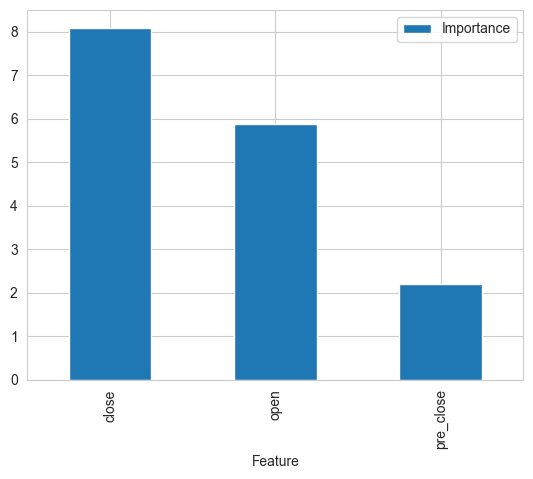

In [43]:
if best_model == 'LogisticRegression':
    # Get feature names after selection
    selected_features = X_train.columns[pipeline_clf['feat_selection'].get_support()]

    # Get model coefficients
    coefficients = pipeline_clf['model'].coef_[0]  # Use [0] for binary classification

    # Create DataFrame with absolute value of coefficients (magnitude implies importance)
    df_feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': np.abs(coefficients)
    }).sort_values(by='Importance', ascending=False)

    # Get best features in descending importance
    best_features = df_feature_importance['Feature'].to_list()

    # Most important features statement and plot
    print(f"* These are the {len(best_features)} most important features in descending order. "
        f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

    df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
    plt.show()

In [44]:
if best_model == 'AdaBoostClassifierLR':
    model = pipeline_clf['model']

    # Check if feature_importances_ is available
    if hasattr(model, "feature_importances_"):
        selected_features = X_train.columns[pipeline_clf['feat_selection'].get_support()]
        importances = model.feature_importances_

        # Create DataFrame with feature importances
        df_feature_importance = (
            pd.DataFrame({
                'Feature': selected_features,
                'Importance': importances
            })
            .sort_values(by='Importance', ascending=False)
        )

        # Extract feature names in order of importance
        best_features = df_feature_importance['Feature'].to_list()

        # Print and plot
        print(f"* These are the {len(best_features)} most important features in descending order. "
              f"The model was trained on them: \n{best_features}")

        df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
        plt.tight_layout()
        plt.show()
    else:
        print("AdaBoostClassifier does not expose feature importances.")


In [45]:
from sklearn.metrics import classification_report, confusion_matrix


def confusion_matrix_and_report(X, y, pipeline, label_map):

    prediction = pipeline.predict(X)

    print('---  Confusion Matrix  ---')
    print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
          columns=[["Actual " + sub for sub in label_map]],
          index=[["Prediction " + sub for sub in label_map]]
          ))
    print("\n")

    print('---  Classification Report  ---')
    print(classification_report(y, prediction, target_names=label_map), "\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)

    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)

In [46]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline_clf,
                label_map= ['0', '1'] 
                )

#### Train Set #### 

---  Confusion Matrix  ---
             Actual 0 Actual 1
Prediction 0     1073      455
Prediction 1      443     1057


---  Classification Report  ---
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1516
           1       0.70      0.70      0.70      1512

    accuracy                           0.70      3028
   macro avg       0.70      0.70      0.70      3028
weighted avg       0.70      0.70      0.70      3028
 

#### Test Set ####

---  Confusion Matrix  ---
             Actual 0 Actual 1
Prediction 0      256      140
Prediction 1      101      260


---  Classification Report  ---
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       357
           1       0.72      0.65      0.68       400

    accuracy                           0.68       757
   macro avg       0.68      0.68      0.68       757
weighted avg       0.69      0.68      0.68      

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [47]:
try:
  # create here your folder
  os.makedirs(name='')
except Exception as e:
  print(e)


[WinError 3] The system cannot find the path specified: ''
